# Visualizing Exponential based Physics Term
Ideally, the following equation should hold (Under the assumptions that partial pathlength from each layer is independent of each other).  
$$log(I_2/I_1) = log(\frac{<exp(-\mu_2 L)>}{<exp(-\mu_1 L)>})$$
$$or, log(I_2/I_1) - log(\frac{<exp(-\mu_2 L)>}{<exp(-\mu_1 L)>}) = 0$$ 
(Moving to new Formula since $\frac{I_2}{I_1}$ is almost always close to 1. It has a very small range. Better to use something else)

## New Formula
$$\frac{I_2 - I_1}{I_2} \approx \frac{<exp(-\mu_2 L) - <exp(-\mu_1 L)>}{<exp(-\mu_2 L)>}$$
$$or, (I_2 - I_1) * <exp(-\mu_2 L)> - (<exp(-\mu_2 L) - <exp(-\mu_1 L)>) * I_2 = 0$$

# Special Notes
The intensity data is normalized per detector, per unit power and per area. However, the exp data is not. Trying to compare their magnitudes will not yield postive results. But if we take their ratios, the constant normalization factor is cancelled out. Additionally, for the exp terms, taking the ratio also takes care of the non-pulsatile contributions from other layers. This allows us to only work with the fetal layer component. No matter what equation we construct, these two things should always be kept in consideration. 

The purpose of this notebook is to check if this exponential based loss term is better compared to the simplified/approximated Beer-Lambert Law based term. If this one is better, the distribution should stick closer to zero and very few values would veer away from 0. 

In [1]:
# Load in pre-saved data
from pathlib import Path
import json
import pandas as pd
import numpy as np

# Load the log intensity data
i1_and_i2_data_path = Path().resolve().parent.parent / "data" / "processed_data" / "I1_and_I2.pkl"
i1_and_i2 = pd.read_pickle(i1_and_i2_data_path)
i1_and_i2_config_path = i1_and_i2_data_path.with_suffix('.json')
with open(i1_and_i2_config_path, 'r') as file:
    i1_and_i2_config = json.load(file)
intensity_columns = i1_and_i2_config['features']

In [2]:
# Split by wavelength and pulsation point
wv1_i1 = [x for x in intensity_columns if x.endswith('1.0_1')]
wv1_i2 = [x for x in intensity_columns if x.endswith('1.0_2')]
wv2_i1 = [x for x in intensity_columns if x.endswith('2.0_1')]
wv2_i2 = [x for x in intensity_columns if x.endswith('2.0_2')]

In [3]:
# Load the exp terms data
l4_dist_data_path = Path().resolve().parent.parent / "data" / "processed_data" / "l4_bins.pkl"
l4_dist_term = pd.read_pickle(l4_dist_data_path)
l4_dist_config_path = l4_dist_data_path.with_suffix('.json')
with open(l4_dist_config_path, 'r') as file:
    l4_dist_config = json.load(file)
chosen_detector_index = l4_dist_config['chosen_detector_index']

# Sort by wavelength
l4_dist_columns = l4_dist_config['features']
l4_dist_columns = [str(x) for x in l4_dist_columns]
wv1_l4_dist = (l4_dist_term[l4_dist_term['Wave Int'] == 1])[['Maternal Wall Thickness'] + l4_dist_columns]
wv2_l4_dist = (l4_dist_term[l4_dist_term['Wave Int'] == 2])[['Maternal Wall Thickness'] + l4_dist_columns]
# Set indices to Maternal Wall Thickness for easy mapping
wv1_l4_dist.set_index('Maternal Wall Thickness', inplace=True)
wv2_l4_dist.set_index('Maternal Wall Thickness', inplace=True)

# Start putting everytghing onto data
data = i1_and_i2.copy()
for column in l4_dist_columns:
    data[column + ' WV1'] = data['Maternal Wall Thickness'].map(wv1_l4_dist[column])
    data[column + ' WV2'] = data['Maternal Wall Thickness'].map(wv2_l4_dist[column])
    
print("Length of Data: ", len(data))
print("Data Columns", data.columns)

Length of Data:  515592
Data Columns Index(['10_2.0_1', '15_2.0_1', '19_2.0_1', '24_2.0_1', '28_2.0_1', '33_2.0_1',
       '37_2.0_1', '41_2.0_1', '46_2.0_1', '50_2.0_1',
       ...
       '19.56159 WV1', '19.56159 WV2', '37.44415 WV1', '37.44415 WV2',
       '71.67437 WV1', '71.67437 WV2', '137.19674 WV1', '137.19674 WV2',
       '262.61751 WV1', '262.61751 WV2'],
      dtype='object', length=107)


In [4]:
pd.set_option('display.max_columns', None)
data.describe()

,10_2.0_1,15_2.0_1,19_2.0_1,24_2.0_1,28_2.0_1,33_2.0_1,37_2.0_1,41_2.0_1,46_2.0_1,50_2.0_1,55_2.0_1,59_2.0_1,64_2.0_1,68_2.0_1,72_2.0_1,77_2.0_1,81_2.0_1,86_2.0_1,90_2.0_1,94_2.0_1,10_1.0_1,15_1.0_1,19_1.0_1,24_1.0_1,28_1.0_1,33_1.0_1,37_1.0_1,41_1.0_1,46_1.0_1,50_1.0_1,55_1.0_1,59_1.0_1,64_1.0_1,68_1.0_1,72_1.0_1,77_1.0_1,81_1.0_1,86_1.0_1,90_1.0_1,94_1.0_1,10_2.0_2,15_2.0_2,19_2.0_2,24_2.0_2,28_2.0_2,33_2.0_2,37_2.0_2,41_2.0_2,46_2.0_2,50_2.0_2,55_2.0_2,59_2.0_2,64_2.0_2,68_2.0_2,72_2.0_2,77_2.0_2,81_2.0_2,86_2.0_2,90_2.0_2,94_2.0_2,10_1.0_2,15_1.0_2,19_1.0_2,24_1.0_2,28_1.0_2,33_1.0_2,37_1.0_2,41_1.0_2,46_1.0_2,50_1.0_2,55_1.0_2,59_1.0_2,64_1.0_2,68_1.0_2,72_1.0_2,77_1.0_2,81_1.0_2,86_1.0_2,90_1.0_2,94_1.0_2,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Saturation,FconcCenters,Fetal Hb Concentration 1,Fetal Hb Concentration 2,0.0 WV1,0.0 WV2,1.45708 WV1,1.45708 WV2,2.7891 WV1,2.7891 WV2,5.33881 WV1,5.33881 WV2,10.21937 WV1,10.21937 WV2,19.56159 WV1,19.56159 WV2,37.44415 WV1,37.44415 WV2,71.67437 WV1,71.67437 WV2,137.19674 WV1,137.19674 WV2,262.61751 WV1,262.61751 WV2
count,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000
mean,0.000010,6.655429e-07,8.152756e-08,7.829655e-09,1.013926e-09,1.193028e-10,1.676853e-11,3.031080e-12,7.232369e-13,2.572651e-13,1.070609e-13,5.532126e-14,2.797409e-14,1.351992e-14,7.333388e-15,3.529437e-15,1.896062e-15,1.030397e-15,4.721790e-16,2.701558e-16,0.000020,1.876099e-06,3.281391e-07,4.958268e-08,1.019808e-08,2.156571e-09,5.841781e-10,2.029146e-10,8.376679e-11,4.126153e-11,2.158359e-11,1.166194e-11,6.759622e-12,3.980514e-12,2.370681e-12,1.382624e-12,7.815351e-13,4.974992e-13,3.011837e-13,1.772188e-13,0.000010,6.655334e-07,8.152357e-08,7.828453e-09,1.013540e-09,1.191883e-10,1.673024e-11,3.016656e-12,7.175370e-13,2.546636e-13,1.058887e-13,5.472164e-14,2.768899e-14,1.336957e-14,7.259137e-15,3.493549e-15,1.876970e-15,1.019284e-15,4.669393e-16,2.668005e-16,0.000020,1.875654e-06,3.279178e-07,4.949404e-08,1.016065e-08,2.141779e-09,5.779433e-10,2.000811e-10,8.243047e-11,4.057486e-11,2.122289e-11,1.146450e-11,6.647644e-12,3.914323e-12,2.331299e-12,1.360427e-12,7.683730e-13,4.890695e-13,2.961002e-13,1.743916e-13,19.000000,13.000000,0.950000,0.400000,4.000000,12.675000,13.000000,0.735865,0.731654,0.005209,0.005200,0.008293,0.008585,0.012025,0.012787,0.016522,0.017693,0.021710,0.023299,0.027129,0.029038,0.031856,0.033746,0.034427,0.035828,0.033552,0.034072
std,0.000002,1.843229e-07,2.949487e-08,3.583622e-09,5.411351e-10,7.101330e-11,1.139689e-11,3.335220e-12,1.470822e-12,6.919056e-13,3.312935e-13,1.742262e-13,8.846968e-14,4.283532e-

In [5]:
# Raise to exponents
for column in l4_dist_columns:
    center = float(column)
    data[column + ' WV1'] = data[column + ' WV1'] * np.exp(-center)
    data[column + ' WV2'] = data[column + ' WV2'] * np.exp(-center)

In [6]:
# Calculate mu's
from inverse_modelling_tfo.tools.optical_properties import get_tissue_mu_a

def calculate_mua0_wv2(row):
    mu_a = get_tissue_mu_a(0.1, row["Fetal Hb Concentration 1"], row["Fetal Saturation"], wave_int=2)
    return mu_a

def calculate_mua1_wv2(row):
    mu_a = get_tissue_mu_a(0.1, row["Fetal Hb Concentration 2"], row["Fetal Saturation"], wave_int=2)
    return mu_a

def calculate_mua0_wv1(row):
    mu_a = get_tissue_mu_a(0.1, row["Fetal Hb Concentration 1"], row["Fetal Saturation"], wave_int=1)
    return mu_a

def calculate_mua1_wv1(row):
    mu_a = get_tissue_mu_a(0.1, row["Fetal Hb Concentration 2"], row["Fetal Saturation"], wave_int=1)
    return mu_a

data["Fetal Mua 1 WV2"] = data.apply(calculate_mua0_wv2, axis=1)
data["Fetal Mua 2 WV2"] = data.apply(calculate_mua1_wv2, axis=1)
data["Fetal Mua 1 WV1"] = data.apply(calculate_mua0_wv1, axis=1)
data["Fetal Mua 2 WV1"] = data.apply(calculate_mua1_wv1, axis=1)

In [7]:
# Accumulate the exponents to the power of mu_a to a single column
data["Accumulate WV1 I1"] = 0.0
data["Accumulate WV1 I2"] = 0.0
data["Accumulate WV2 I1"] = 0.0
data["Accumulate WV2 I2"] = 0.0
for column in l4_dist_columns:
    data["Accumulate WV1 I1"] += np.power(data[column + ' WV1'], data["Fetal Mua 1 WV1"])
    data["Accumulate WV1 I2"] += np.power(data[column + ' WV1'], data["Fetal Mua 2 WV1"])
    data["Accumulate WV2 I1"] += np.power(data[column + ' WV2'], data["Fetal Mua 1 WV2"])
    data["Accumulate WV2 I2"] += np.power(data[column + ' WV2'], data["Fetal Mua 2 WV2"])

In [8]:
data.describe()

,10_2.0_1,15_2.0_1,19_2.0_1,24_2.0_1,28_2.0_1,33_2.0_1,37_2.0_1,41_2.0_1,46_2.0_1,50_2.0_1,55_2.0_1,59_2.0_1,64_2.0_1,68_2.0_1,72_2.0_1,77_2.0_1,81_2.0_1,86_2.0_1,90_2.0_1,94_2.0_1,10_1.0_1,15_1.0_1,19_1.0_1,24_1.0_1,28_1.0_1,33_1.0_1,37_1.0_1,41_1.0_1,46_1.0_1,50_1.0_1,55_1.0_1,59_1.0_1,64_1.0_1,68_1.0_1,72_1.0_1,77_1.0_1,81_1.0_1,86_1.0_1,90_1.0_1,94_1.0_1,10_2.0_2,15_2.0_2,19_2.0_2,24_2.0_2,28_2.0_2,33_2.0_2,37_2.0_2,41_2.0_2,46_2.0_2,50_2.0_2,55_2.0_2,59_2.0_2,64_2.0_2,68_2.0_2,72_2.0_2,77_2.0_2,81_2.0_2,86_2.0_2,90_2.0_2,94_2.0_2,10_1.0_2,15_1.0_2,19_1.0_2,24_1.0_2,28_1.0_2,33_1.0_2,37_1.0_2,41_1.0_2,46_1.0_2,50_1.0_2,55_1.0_2,59_1.0_2,64_1.0_2,68_1.0_2,72_1.0_2,77_1.0_2,81_1.0_2,86_1.0_2,90_1.0_2,94_1.0_2,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Saturation,FconcCenters,Fetal Hb Concentration 1,Fetal Hb Concentration 2,0.0 WV1,0.0 WV2,1.45708 WV1,1.45708 WV2,2.7891 WV1,2.7891 WV2,5.33881 WV1,5.33881 WV2,10.21937 WV1,10.21937 WV2,19.56159 WV1,19.56159 WV2,37.44415 WV1,37.44415 WV2,71.67437 WV1,71.67437 WV2,137.19674 WV1,137.19674 WV2,262.61751 WV1,262.61751 WV2,Fetal Mua 1 WV2,Fetal Mua 2 WV2,Fetal Mua 1 WV1,Fetal Mua 2 WV1,Accumulate WV1 I1,Accumulate WV1 I2,Accumulate WV2 I1,Accumulate WV2 I2
count,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,5.155920e+05,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000,515592.000000
mean,0.000010,6.655429e-07,8.152756e-08,7.829655e-09,1.013926e-09,1.193028e-10,1.676853e-11,3.031080e-12,7.232369e-13,2.572651e-13,1.070609e-13,5.532126e-14,2.797409e-14,1.351992e-14,7.333388e-15,3.529437e-15,1.896062e-15,1.030397e-15,4.721790e-16,2.701558e-16,0.000020,1.876099e-06,3.281391e-07,4.958268e-08,1.019808e-08,2.156571e-09,5.841781e-10,2.029146e-10,8.376679e-11,4.126153e-11,2.158359e-11,1.166194e-11,6.759622e-12,3.980514e-12,2.370681e-12,1.382624e-12,7.815351e-13,4.974992e-13,3.011837e-13,1.772188e-13,0.000010,6.655334e-07,8.152357e-08,7.828453e-09,1.013540e-09,1.191883e-10,1.673024e-11,3.016656e-12,7.175370e-13,2.546636e-13,1.058887e-13,5.472164e-14,2.768899e-14,1.336957e-14,7.259137e-15,3.493549e-15,1.876970e-15,1.019284e-15,4.669393e-16,2.668005e-16,0.000020,1.875654e-06,3.279178e-07,4.949404e-08,1.016065e-08,2.141779e-09,5.779433e-10,2.000811e-10,8.243047e-11,4.057486e-11,2.122289e-11,1.146450e-11,6.647644e-12,3.914323e-12,2.331299e-12,1.360427e-12,7.683730e-13,4.890695e-13,2.961002e-13,1.743916e-13,19.000000,13.000000,0.950000,0.400000,4.000000,12.675000,13.000000,0.735865,0.731654,0.001213,0.001211,0.000510,0.000528,0.000058,0.000061,6.023369e-07,6.450509e-07,6.937102e-11,7.444542e-11

$$\frac{I_2 - I_1}{I_2} \approx \frac{<exp(-\mu_2 L) - <exp(-\mu_1 L)>}{<exp(-\mu_2 L)>}$$

In [9]:
# Calculate the LHS of the first line of the equation above (This is before bringing everything to the same side)
data["LHS WV1"] = (data[wv1_i2[chosen_detector_index]] - data[wv1_i1[chosen_detector_index]]) / data[wv1_i2[chosen_detector_index]]
data["LHS WV2"] = (data[wv2_i2[chosen_detector_index]] - data[wv2_i1[chosen_detector_index]]) / data[wv2_i2[chosen_detector_index]]

# Calculate the RHS of the first line of the equation above (This is before bringing everything to the same side)
data["RHS WV1"] = (data["Accumulate WV1 I2"] - data["Accumulate WV1 I1"]) / data["Accumulate WV1 I2"]
data["RHS WV2"] = (data["Accumulate WV2 I2"] - data["Accumulate WV2 I1"]) / data["Accumulate WV2 I2"]

# Calculate the Error
data["Error WV1"] = data["LHS WV1"] - data["RHS WV1"]
data["Error WV2"] = data["LHS WV2"] - data["RHS WV2"]

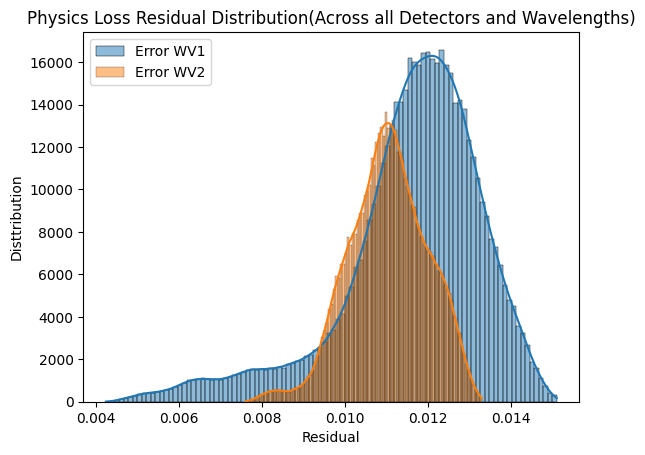

Error WV1 Mean:  0.011599282999920153
Error WV2 Mean:  0.011038989099957205


In [10]:
# Plot the error per wavelength
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data["Error WV1"], bins=100, kde=True, label="Error WV1")
sns.histplot(data["Error WV2"], bins=100, kde=True, label="Error WV2")
plt.xlabel("Residual")
plt.ylabel("Disttribution")
plt.title("Physics Loss Residual Distribution(Across all Detectors and Wavelengths)")
plt.legend()
plt.show()
print("Error WV1 Mean: ", data["Error WV1"].mean())
print("Error WV2 Mean: ", data["Error WV2"].mean())

In [11]:
# Plot the Error Distribution Filtered by Maternal Wall Thickness in two different plots for two different wavelengths
# fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# all_maternal_wall_thickness = data["Maternal Wall Thickness"].unique()
# all_maternal_wall_thickness.sort()

# for maternal_wall_thickness in all_maternal_wall_thickness:
#     error = data[data["Maternal Wall Thickness"] == maternal_wall_thickness]
#     sns.histplot(error["Error WV1"], bins=100, kde=True, label=f"Depth: {maternal_wall_thickness}mm", ax=ax[0])
#     sns.histplot(error["Error WV2"], bins=100, kde=True, label=f"Depth: {maternal_wall_thickness}mm", ax=ax[1])

# ax[0].set_xlabel("Error")
# ax[1].set_xlabel("Error")
# ax[0].set_ylabel("Distribution")
# ax[0].set_title("Error Distribution WV1")
# ax[1].set_title("Error Distribution WV2")
# ax[0].legend()
# plt.tight_layout()
# plt.show()